In [4]:
import pandas as pd
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [7]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

In [8]:
# Split features and target
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

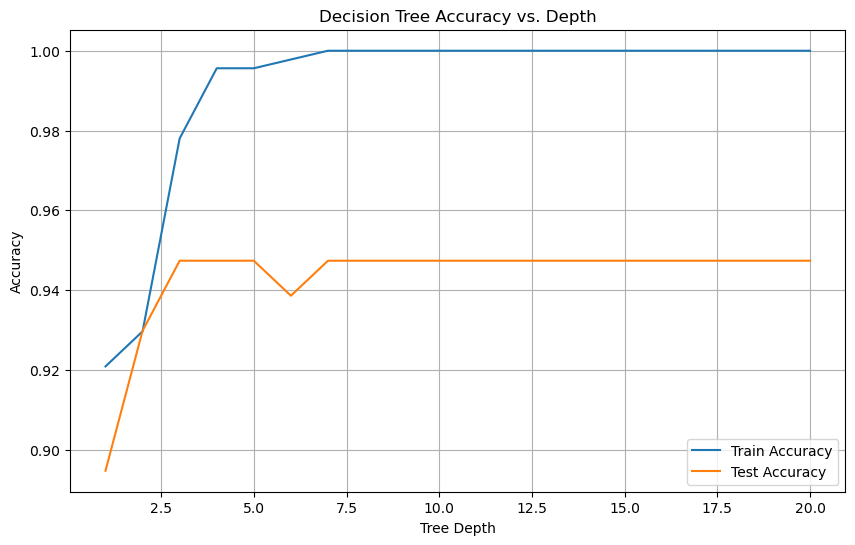

In [11]:
from sklearn.metrics import accuracy_score
import numpy as np

# Analyze overfitting by varying tree depth
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate both models on test data
best_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
best_dt.fit(X_train, y_train)
dt_test_acc = accuracy_score(y_test, best_dt.predict(X_test))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

# Cross-validation scores
dt_cv_scores = cross_val_score(best_dt, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)

{
    "Decision Tree Test Accuracy": dt_test_acc,
    "Random Forest Test Accuracy": rf_test_acc,
    "Decision Tree CV Accuracy (mean ± std)": (dt_cv_scores.mean(), dt_cv_scores.std()),
    "Random Forest CV Accuracy (mean ± std)": (rf_cv_scores.mean(), rf_cv_scores.std())
}


{'Decision Tree Test Accuracy': 0.9473684210526315,
 'Random Forest Test Accuracy': 0.9649122807017544,
 'Decision Tree CV Accuracy (mean ± std)': (0.91914299021891,
  0.01795477462637665),
 'Random Forest CV Accuracy (mean ± std)': (0.9560937742586555,
  0.02283883380490945)}